> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Medical Appointment No Shows!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Why do 30% of patients miss their scheduled appointments?
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
in this notebook we will search for the reasons why some patients miss thier scheduled appointment

>Q1:Does women cares more than men about thier health?

>Q2:Does the period between Scheduled Day and Appointment Day has any effect?

>Q3:Do people hate to go anywhere in holidays and love to stay home?

>Q4:Does the age has any effect?,Does older people care about their health than younger ones?

>Q5:are people in particular Neighbourhood are careless than the others?

>Q6:Having a Scholarship or not affect patients care?

>Q7:Having a diseases makes any affect?

>Q8:Getting more than SMS affects?


In [23]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [24]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   

 

In [25]:
for col in df.columns:
    print(col, type(df[col][0]))

PatientId <class 'numpy.float64'>
AppointmentID <class 'numpy.int64'>
Gender <class 'str'>
ScheduledDay <class 'str'>
AppointmentDay <class 'str'>
Age <class 'numpy.int64'>
Neighbourhood <class 'str'>
Scholarship <class 'numpy.int64'>
Hipertension <class 'numpy.int64'>
Diabetes <class 'numpy.int64'>
Alcoholism <class 'numpy.int64'>
Handcap <class 'numpy.int64'>
SMS_received <class 'numpy.int64'>
No-show <class 'str'>


## Data Cleaning 
### 1) Search for duplicate or missing data
### 2) Create a new  Data Frame with needed Columns
### 3) Change Type of AppointmentDay and ScheduledDay to Date type
### 4) create a new column to indicate the day of week
### 5) Handicap and SMS received are switched together
### 6) Change type of some Data to str to have a better understanding
### 7) make columns in lower case and remove the spaces
### 8) calculate the period between schedule and appointment day and save it new column
### 9) remove child and 100 year old petients


## 1) Search for duplicate or missing data

In [26]:
print(df.isna().sum())
print(df.duplicated().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
0


## 2)Create a new  Data Frame with needed Columns

In [27]:
df_no_shows = df[df['No-show']=='Yes']
df_no_shows = df_no_shows.drop(['PatientId','AppointmentID','No-show'],axis=1)
df_no_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 11 columns):
Gender            22319 non-null object
ScheduledDay      22319 non-null object
AppointmentDay    22319 non-null object
Age               22319 non-null int64
Neighbourhood     22319 non-null object
Scholarship       22319 non-null int64
Hipertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
Handcap           22319 non-null int64
SMS_received      22319 non-null int64
dtypes: int64(7), object(4)
memory usage: 2.0+ MB


In [28]:
df_no_shows.reset_index(drop = True)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0
1,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0
2,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1
3,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0
4,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0
5,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0
6,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1
7,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0
8,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0
9,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1


## 3)Change Type of AppointmentDay and ScheduledDay to Date type

In [29]:
df_no_shows['AppointmentDay'] = pd.to_datetime(df_no_shows.AppointmentDay)
df_no_shows['ScheduledDay'] = pd.to_datetime(df_no_shows.ScheduledDay)

In [30]:
df_no_shows[['AppointmentDay','ScheduledDay']].head()
df_no_shows.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
dtype: object

## 4) create a new column to indicate the day of week

In [31]:
# we make a neew column to specify the day of the Appointment
df_no_shows['day_of_week'] = df_no_shows['AppointmentDay'].dt.day_name()
df_no_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 12 columns):
Gender            22319 non-null object
ScheduledDay      22319 non-null datetime64[ns]
AppointmentDay    22319 non-null datetime64[ns]
Age               22319 non-null int64
Neighbourhood     22319 non-null object
Scholarship       22319 non-null int64
Hipertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
Handcap           22319 non-null int64
SMS_received      22319 non-null int64
day_of_week       22319 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 2.2+ MB


In [32]:
df_no_shows.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,day_of_week
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Friday
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Friday
11,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Friday


## 5) Handicap and SMS received are switched together

In [33]:
#i had a problem with handcap and sms_messages they are switched
#if we saw the data we now that handicap has a true or false and sms has an integer value bigger or equal to 0
df_no_shows.rename(columns={"SMS_received": "Handicap", "Handcap": "SMS_received"},inplace=True)

In [34]:
df_no_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 12 columns):
Gender            22319 non-null object
ScheduledDay      22319 non-null datetime64[ns]
AppointmentDay    22319 non-null datetime64[ns]
Age               22319 non-null int64
Neighbourhood     22319 non-null object
Scholarship       22319 non-null int64
Hipertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
SMS_received      22319 non-null int64
Handicap          22319 non-null int64
day_of_week       22319 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 2.2+ MB


## 6) Change type of some Data to str to have a better understanding

In [35]:
def inttostr(df,col):
    df[col]= df[col].astype(str)
    df[col]= df[col].replace(["0","1"],["False","True"])
    return df[col]   
df_no_shows['Alcoholism'] = inttostr(df_no_shows,'Alcoholism')
df_no_shows['Diabetes'] = inttostr(df_no_shows,'Diabetes')
df_no_shows['Handicap'] = inttostr(df_no_shows,'Handicap')
df_no_shows['Hipertension'] = inttostr(df_no_shows,'Hipertension')
df_no_shows['Scholarship'] = inttostr(df_no_shows,'Scholarship')

## 7) make columns in lower case and remove the spaces

In [36]:
df_no_shows.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_no_shows.rename(columns={"hipertension": "hypertension"},inplace=True)
df_no_shows.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 12 columns):
gender            22319 non-null object
scheduledday      22319 non-null datetime64[ns]
appointmentday    22319 non-null datetime64[ns]
age               22319 non-null int64
neighbourhood     22319 non-null object
scholarship       22319 non-null object
hypertension      22319 non-null object
diabetes          22319 non-null object
alcoholism        22319 non-null object
sms_received      22319 non-null int64
handicap          22319 non-null object
day_of_week       22319 non-null object
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 2.2+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 8) make a different columns represtend the period between schedule and appointment day

In [37]:
df_no_shows['difference'] = df_no_shows['appointmentday'].sub(df_no_shows['scheduledday'], axis=0)
df_no_shows['scheduledday'] = df_no_shows['scheduledday'].dt.strftime("%d-%m-%Y")
df_no_shows['appointmentday'] = df_no_shows['appointmentday'].dt.strftime("%d-%m-%Y")

## 9)remove child and 100 year old petients

In [38]:
df_no_shows = df_no_shows[(df_no_shows['age'] > 18) & (df_no_shows['age'] < 100)]
assert (df_no_shows['age'].max() < 100) & (df_no_shows['age'].min() > 18)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1  (Q1:Does women cares more than men about thier health?)

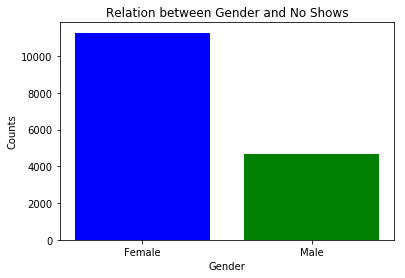

In [39]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
df_no_shows['gender'].replace(["M","F"],["Male","Female"], inplace=True)
x=["Male","Female"]
colors = ["green" ,"blue"]
values = df_no_shows['gender'].value_counts()
y = [values[1],values[0]]
plt.bar(x,y,color=colors)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title("Relation between Gender and No Shows")
plt.show()

### it appears that women misses their Appointment more than men

### Research Question 2  (Q2:Does the period between Scheduled Day and Appointment Day has any effect?)

In [40]:
df_same_week = df_no_shows[(df_no_shows['difference'] <= '7 days') & (df_no_shows['difference'] > '0 days')]
df_same_day= df_no_shows[(df_no_shows['difference'] <= '0 days')]
df_more_week = df_no_shows[(df_no_shows['difference'] > '7 days')]

In [41]:
df_no_shows_final = df_no_shows

[5979, 987, 9003]


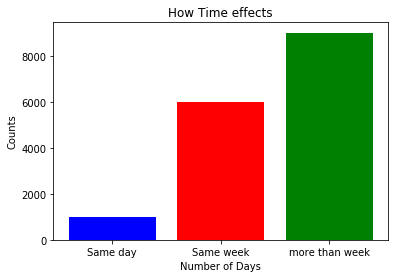

In [42]:
days = [df_same_week['difference'].count(),df_same_day['difference'].count(),df_more_week['difference'].count()]
print(days)
colors = ["red","blue","green"]
x = ["Same week","Same day","more than week"]
y = [days[0],days[1],days[2]]
plt.bar(x,y,color=colors)
plt.xlabel("Number of Days")
plt.ylabel("Counts")
plt.title("How Time effects")
plt.show()

### looks like if the period between scheduled day and appointment day more than week 
### petients are likly to miss it

### Research Question 3  (Q3:Do people hate to go anywhere in holidays and love to stay home?

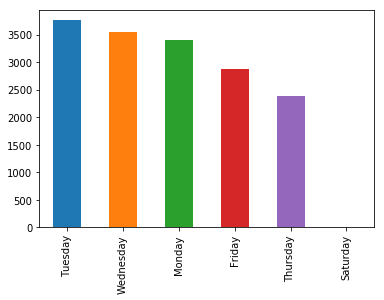

In [43]:
df_no_shows_final['day_of_week'].value_counts().plot.bar()

### people misses their appointment  if it is in the middle of the week because they are busy doing their jops

### Q4:Does the age has any effect?,Does older people care about their health than younger ones?

Text(0,0.5,'counts')

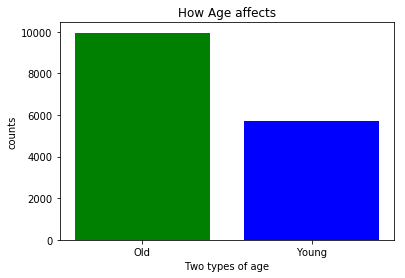

In [44]:
df_old=df_no_shows_final[df_no_shows_final["age"] < 50]
df_young = df_no_shows_final[df_no_shows_final["age"] > 50]
counts =[df_old['age'].count(),df_young['age'].count()]
names = ["Old","Young"]
colors=["green","blue"]
plt.bar(names,counts,color=colors)
plt.title("How Age affects")
plt.xlabel("Two types of age")
plt.ylabel("counts")

### looks like old people misses more than young ,maybe they need someone to pick them

### Research Question 5  (Q5 are people in particular Neighbourhood are careless that the others?

Text(0.5,1,'Neighbourhood Affection')

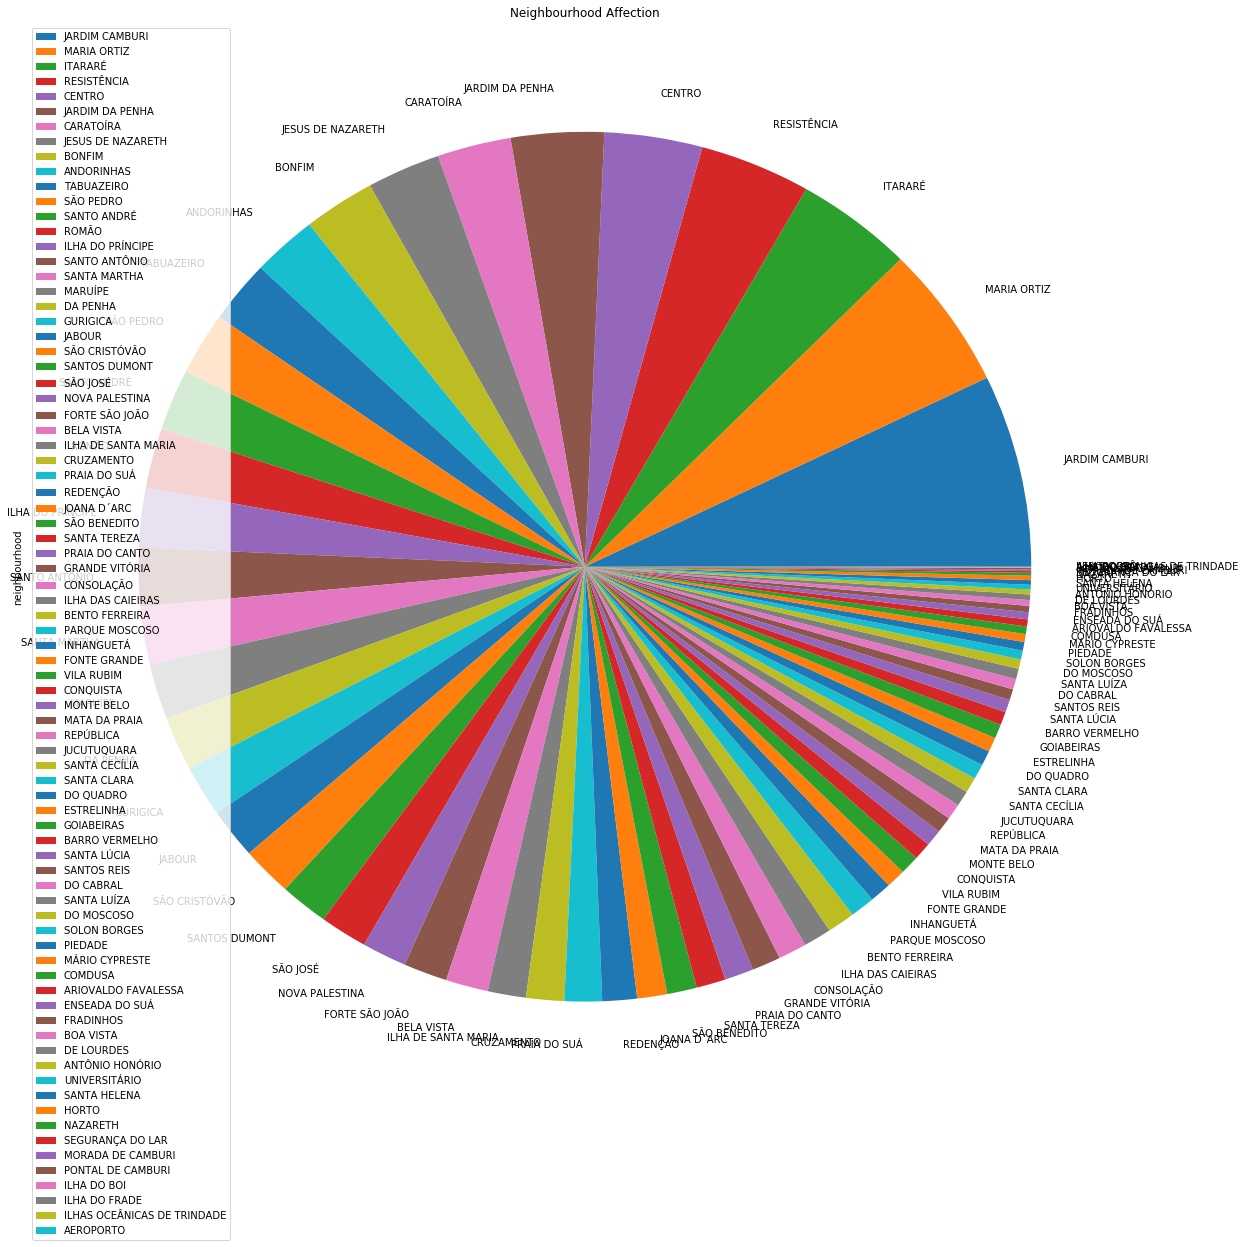

In [45]:
df_no_shows_final['neighbourhood'].value_counts().plot.pie(figsize=(20,20), legend=True)
plt.title('Neighbourhood Affection')

### Seems that petients in some neighbourhood are careless more than the others like ( jardim camburi , maria ortiz , etc)

### Research Question 6  (Q6 Having a Scholarship or not affect patients care?

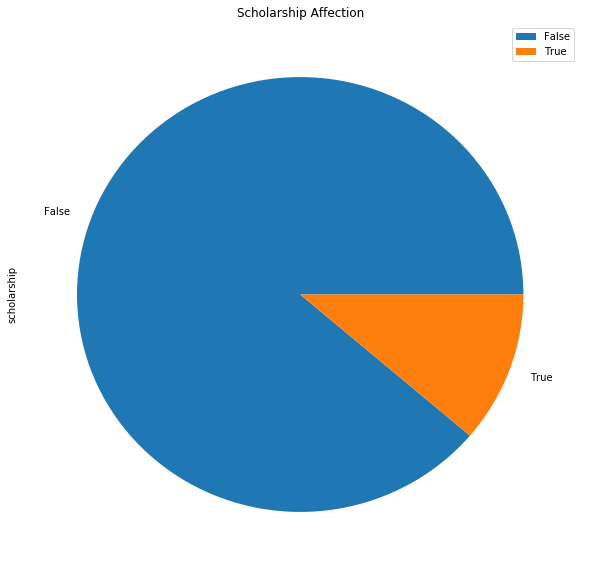

In [46]:
df_no_shows_final['scholarship'].value_counts().plot.pie(figsize=(10,10),legend=True,title="Scholarship Affection")

### if they doesnt have Scholarship they are more likly to miss the appointment

### Research Question 7  (Q7 Having a diseases makes any affect?

Text(0.5,1,'Hipertension Affections')

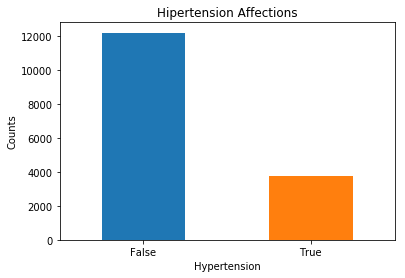

In [47]:
df_no_shows_final['hypertension'].value_counts().plot.bar(rot=0)
plt.xlabel("Hypertension")
plt.ylabel("Counts")
plt.title("Hypertension Affections")

Text(0.5,1,'Diabetes Affections')

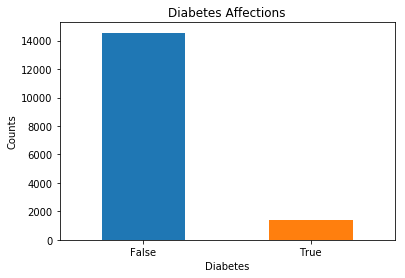

In [48]:
df_no_shows_final['diabetes'].value_counts().plot.bar(rot=0)
plt.xlabel("Diabetes")
plt.ylabel("Counts")
plt.title("Diabetes Affections")

### diseases have no effections

### Research Question 8  (Q8 Does Alcohol affects?

Text(0.5,1,'Alcohol Affections')

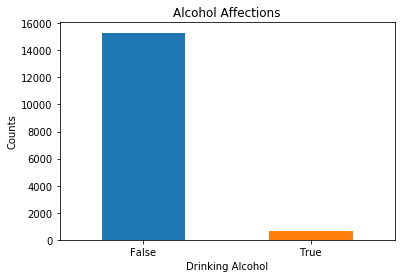

In [49]:
df_no_shows_final['alcoholism'].value_counts().plot.bar(rot=0)
plt.xlabel("Drinking Alcohol")
plt.ylabel("Counts")
plt.title("Alcohol Affections")

### Alcohol have no effections

### Research Question 8  (Q9 Getting more than Sms affects?

Text(0.5,1,'SMS')

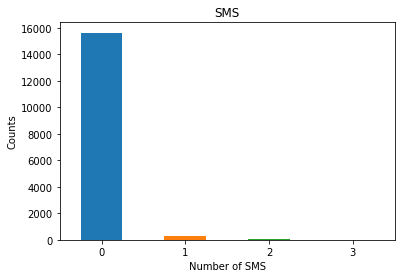

In [50]:
df_no_shows_final['sms_received'].value_counts().plot.bar(rot=0)
plt.xlabel("Number of SMS")
plt.ylabel("Counts")
plt.title("SMS")

### if patients didnt get any sms message they are likly to miss the appointment

##  Correlation matrix for DataFrame

In [51]:
df_no_shows_final.corr()

,age,sms_received
age,1.000000,0.095333
sms_received,0.095333,1.000000


Text(0.5,1,'correlation matrix for DataFrame')

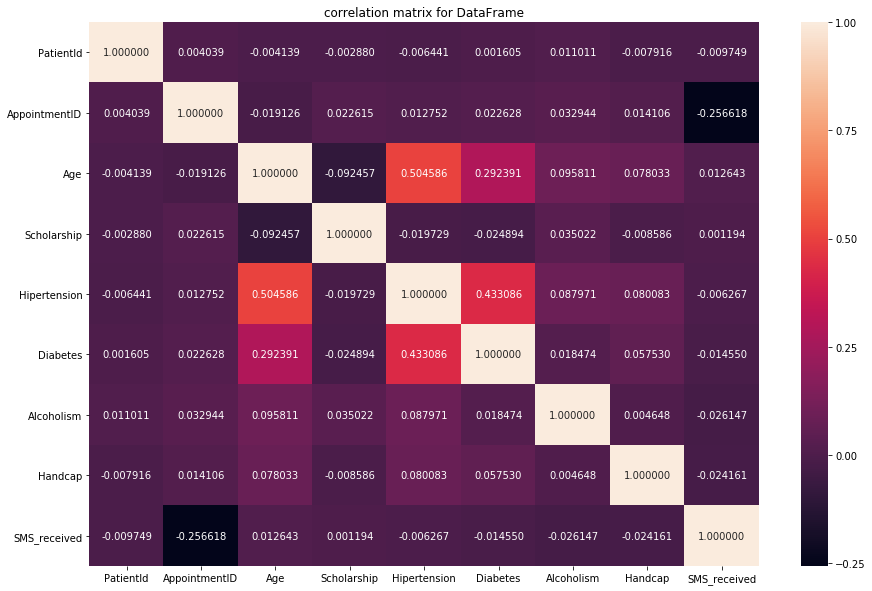

In [52]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(df.corr(), annot=True, fmt="f",ax=ax)
plt.title('correlation matrix for DataFrame')

<a id='conclusions'></a>
# Conclusions
##      Finally we coclude that the variables that makes patients  dont show
###               1)Scholarship(yes or no)
###               2)Age (above 50 patients are likly to miss)
###               3)if the period more than week,petints are more likly to miss the appointment
###               3)Day (in middle of the week people are likly to miss)
###               4)Gender (women misses more than men)
###               5)petients from n( jardim camburi , maria ortiz , etc)
###               6)if they didnt recieve message they might miss the appointment

# Limitations
###               1)we didnt have the types of the diseases they have so we now it is necessary to go to hospital
###               2)the neighbourhood part we dont know if their is a hosbital near to it or not 
###               3)some data where switched 
###               4)about the age we cant conclude why older patients miss their appointment more than younger ones 
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0